# Are Dairy Farms in Trouble?

#### By Ruchika Sah

## Problem Statement

According to the Dairy Farmers of America(DFA), sales of milk dropped by over 9% last year. The reasons for this could be rising awareness of global issues, animal rights, environmental impact of milk, dairy intolerance etc.

I am a dairy farmer, who is seeing profits going down and wants to make a decision about switching to the production of plant based milk. To do this I need insights about whether people who predominantly eat plant based food (Vegetarians) are switching from dairy milk to plant based milk alternatives like almond milk, oat milk etc.

I will be looking at reddit posts from the subreddit forums of Vegetarians and Vegans so I can target the Vegetarians for my research.I find that both the categories of people post freely in both subreddits and I would need to do some processing of the posts to figure out who to target. I will be running a few regression models on the words of the texts that I have to find where each post belongs. The Regression models that I think will work the best are the CountVectorized Logistic Regression, the CountVectorized Multinomial Bayes Model, the TF-IDF Vectorized Logistic Model and the TF-IDF Vectorized SVM (Support Vector Machine) Model. I will be using the metric of the Cross Validated Accuracy Score to compare my models to choose the best one.



## Executive Summary

In order to begin the process of building the model, I first had to scrape data using the Reddit Pushshift API. The API allows for only 30 days at a time. So I had to create a loop so that we could get data from the last 150 days, from both the subreddit forms, r/Vegetarian and r/Vegan.

Data Cleaning : The data was cleaned in a few ways. The simplest was dropping unnecessary columns as well as converting the date_posted column into an actual datetime data type. Next I removed HTML characters as well as all other characters and numbers and the [removed] datapoint, which I think were images.I also combined the 'title' column with the 'selftext' column so that I would have a larger amount of text to work with. Since I had less than 5000 rows, it made sense to get the largest amount of text that I could get.   

Preprocessing and Modeling: After cleaning the data, I decided to Lemmatize the data and add stopwords to the existing stopword dictionary. This was done to avoid words that frequently appeared in posts because that would give us false positives in my model. I attempted to use and fit CountVectorizer and TF-IDF Transformers and various classifiers including logistical regression, Support Vector Machine and multinomial naive bayes. We complemented these classifiers with some necessary hyperparameters in order to select the best classifier, based on accuracy.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Are-Dairy-Farms-in-Trouble?" data-toc-modified-id="Are-Dairy-Farms-in-Trouble?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Are Dairy Farms in Trouble?</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#By-Ruchika-Sah" data-toc-modified-id="By-Ruchika-Sah-1.0.0.1"><span class="toc-item-num">1.0.0.1&nbsp;&nbsp;</span>By Ruchika Sah</a></span></li></ul></li></ul></li><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Executive-Summary" data-toc-modified-id="Executive-Summary-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Executive Summary</a></span></li></ul></li><li><span><a href="#Loading-Data" data-toc-modified-id="Loading-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading Data</a></span></li><li><span><a href="#Data-Cleaning-and-EDA" data-toc-modified-id="Data-Cleaning-and-EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Cleaning and EDA</a></span><ul class="toc-item"><li><span><a href="#Visualizing-the-Data" data-toc-modified-id="Visualizing-the-Data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Visualizing the Data</a></span><ul class="toc-item"><li><span><a href="#Distribution-of-posts-for-each-subreddit-on-each-weekday" data-toc-modified-id="Distribution-of-posts-for-each-subreddit-on-each-weekday-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Distribution of posts for each subreddit on each weekday</a></span></li><li><span><a href="#Most-Common-Words" data-toc-modified-id="Most-Common-Words-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Most Common Words</a></span></li><li><span><a href="#Comparing-the-top-words-for-both-groups-together" data-toc-modified-id="Comparing-the-top-words-for-both-groups-together-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Comparing the top words for both groups together</a></span></li></ul></li><li><span><a href="#Preprocessing-of-the-data" data-toc-modified-id="Preprocessing-of-the-data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Preprocessing of the data</a></span><ul class="toc-item"><li><span><a href="#Adding-the-most-frequently-used-words-to-the-stopwords-parameter-'english'" data-toc-modified-id="Adding-the-most-frequently-used-words-to-the-stopwords-parameter-'english'-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Adding the most frequently used words to the stopwords parameter 'english'</a></span></li><li><span><a href="#Creating-a-funtion-that-will-remove-characters-and-Lemmatize-the-words-in-the-column-'text_selftext'" data-toc-modified-id="Creating-a-funtion-that-will-remove-characters-and-Lemmatize-the-words-in-the-column-'text_selftext'-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Creating a funtion that will remove characters and Lemmatize the words in the column 'text_selftext'</a></span></li></ul></li></ul></li><li><span><a href="#Model-Preparation" data-toc-modified-id="Model-Preparation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model Preparation</a></span><ul class="toc-item"><li><span><a href="#Baseline-Model" data-toc-modified-id="Baseline-Model-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Baseline Model</a></span><ul class="toc-item"><li><span><a href="#Modeling" data-toc-modified-id="Modeling-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Modeling</a></span></li></ul></li><li><span><a href="#Transforming-Data-using-CountVectorization-and-running-a-Logistic-Regression" data-toc-modified-id="Transforming-Data-using-CountVectorization-and-running-a-Logistic-Regression-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Transforming Data using CountVectorization and running a Logistic Regression</a></span></li><li><span><a href="#Transforming-Data-using-CountVectorizer-and-Running-a-Multinomial-NB-Regression" data-toc-modified-id="Transforming-Data-using-CountVectorizer-and-Running-a-Multinomial-NB-Regression-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Transforming Data using CountVectorizer and Running a Multinomial NB Regression</a></span></li><li><span><a href="#Transforming-Data-Using-TF-IDF-and-Running-a-Logistic-Regression" data-toc-modified-id="Transforming-Data-Using-TF-IDF-and-Running-a-Logistic-Regression-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Transforming Data Using TF-IDF and Running a Logistic Regression</a></span></li><li><span><a href="#Transforming-Data-using-a-TF-IDF-Vectorizer-and-Running-a-SVM-Regression" data-toc-modified-id="Transforming-Data-using-a-TF-IDF-Vectorizer-and-Running-a-SVM-Regression-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Transforming Data using a TF-IDF Vectorizer and Running a SVM Regression</a></span></li></ul></li><li><span><a href="#Model-Selection" data-toc-modified-id="Model-Selection-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Selection</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#The-ROC-Curve-and-the-AUC" data-toc-modified-id="The-ROC-Curve-and-the-AUC-5.0.1"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>The ROC Curve and the AUC</a></span></li></ul></li><li><span><a href="#Evaluating-the-Logistic-Regression-with-TF-IDF" data-toc-modified-id="Evaluating-the-Logistic-Regression-with-TF-IDF-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Evaluating the Logistic Regression with TF-IDF</a></span><ul class="toc-item"><li><span><a href="#Calculating-the-confustion-matrix" data-toc-modified-id="Calculating-the-confustion-matrix-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Calculating the confustion matrix</a></span></li><li><span><a href="#Finding-the-Coefficients" data-toc-modified-id="Finding-the-Coefficients-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Finding the Coefficients</a></span></li><li><span><a href="#Plotting-the-coefficients-to-see-the-top-20" data-toc-modified-id="Plotting-the-coefficients-to-see-the-top-20-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Plotting the coefficients to see the top 20</a></span></li></ul></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Next-Steps" data-toc-modified-id="Next-Steps-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Next Steps</a></span></li><li><span><a href="#References" data-toc-modified-id="References-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Loading Data

[Data_Acquisition.ipynb](./Data_Acquisition.ipynb) 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import regex as re

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import nltk
from bs4 import BeautifulSoup

from nltk.stem import WordNetLemmatizer


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import stop_words
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [2]:
df = pd.read_csv('./data/df.csv')
df.head()

,title,selftext,subreddit,author,created_utc,num_comments,is_self,timestamp
0,Just got into an argument at work about my die...,Hi all. So I kinda fit here not really. I’m pe...,vegetarian,santanabanana,1577743889,27,True,2019-12-30
1,ew,[removed],vegetarian,VaccinesAreHarmful,1577746333,1,True,2019-12-30
2,Converting to vegetarianism,"Hi, y'all. For my new years resolution, I'm go...",vegetarian,beetlejuicejunebug,1577748871,15,True,2019-12-30
3,Dropping meat in 2020,Long time (heavy) meat eater. I want to make ...,vegetarian,sbdallas,1577749284,87,True,2019-12-30
4,New Year Dinner???,"Hey guys, I know that I’ll probably have many ...",vegetarian,SentimentalDeparture,1577751383,6,True,2019-12-30


In [3]:
df_vegetarian = pd.read_csv('./data/subreddit_vegetarian.csv')

In [4]:
df_vegan = pd.read_csv('./data/subreddit_vegan.csv')

# Data Cleaning and EDA

Dropping the Null values, making titles into lower case letters, removing some unwanted characters and creating a map of the dates for Graphs.

I have also created a column called 'title_selftext' by adding the two columns 'title' and 'selftext'(which is the main post), so that I have a larger pool of text to work with. 

In [5]:
def cleaning(data):
    data.dropna(subset=['selftext'], inplace = True)
    data.drop(columns = ['created_utc'], inplace = True)
    data['subreddit'] = data['subreddit'].map({'vegan': 0, 'vegetarian': 1})
    data['title'] = data['title'].str.lower()
    data['selftext'] = data['selftext'].str.lower()
    data['selftext'] = data['selftext'].str.replace('\n', '')
    data['title'] = data['title'].str.replace('\n', '')
    data['selftext'] = data['selftext'].str.replace('removed','')
    data['selftext'] = data['selftext'].str.replace('[','')
    data['selftext'] = data['selftext'].str.replace(']','')
    data["title_selftext"] = data['title'] + data['selftext']
    data['timestamp'] = pd.to_datetime(data.timestamp) 
    data["day"] = data['timestamp'].dt.dayofweek
    data['weekday'] = data['day'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3 : 'Thursday', 4: 'Friday',
                               5: 'Saturday',  6: 'Sunday'})

In [6]:
cleaning(df_vegetarian)

In [7]:
cleaning(df_vegan)

In [8]:
cleaning(df)

In [9]:
# Removing https characters from the column title_selftext
df["title_selftext"] = df["title_selftext"].str.replace('http\S+|www.\S+', '', case=False)
df_vegetarian["title_selftext"] = df_vegetarian["title_selftext"].str.replace('http\S+|www.\S+', '', case=False)
df_vegan["title_selftext"] = df_vegan["title_selftext"].str.replace('http\S+|www.\S+', '', case=False)


In [10]:
df.shape

(2151, 10)

In [11]:
df_vegetarian.head()

,Unnamed: 0,title,selftext,subreddit,author,num_comments,is_self,timestamp,title_selftext,day,weekday
0,0,just got into an argument at work about my die...,hi all. so i kinda fit here not really. i’m pe...,1,santanabanana,27,True,2019-12-30,just got into an argument at work about my die...,0,Monday
1,1,ew,,1,VaccinesAreHarmful,1,True,2019-12-30,ew,0,Monday
2,3,converting to vegetarianism,"hi, y'all. for my new years resolution, i'm go...",1,beetlejuicejunebug,15,True,2019-12-30,"converting to vegetarianismhi, y'all. for my n...",0,Monday
3,4,dropping meat in 2020,long time (heavy) meat eater. i want to make ...,1,sbdallas,87,True,2019-12-30,dropping meat in 2020long time (heavy) meat ea...,0,Monday
4,5,new year dinner???,"hey guys, i know that i’ll probably have many ...",1,SentimentalDeparture,6,True,2019-12-30,"new year dinner???hey guys, i know that i’ll p...",0,Monday


In [12]:
# Checking for null values
df['title_selftext'].isnull().sum()

0

In [13]:
# Looking at the timestamp column
df['timestamp'].describe()

count                    2151
unique                     76
top       2020-01-01 00:00:00
freq                      115
first     2019-09-01 00:00:00
last      2020-01-10 00:00:00
Name: timestamp, dtype: object

In [14]:
# The frequency of posts on the days of the week
df['weekday'].value_counts()

Monday       399
Tuesday      382
Wednesday    381
Thursday     263
Sunday       257
Friday       235
Saturday     234
Name: weekday, dtype: int64

In [15]:
# Dividing dataframes into two smaller ones for each subreddit for EDA purposes
sub1 = df[df['subreddit'] == 1]['weekday'].value_counts().reset_index()
sub0 = df[df['subreddit'] == 0]['weekday'].value_counts().reset_index()

In [16]:
sub1

,index,weekday
0,Monday,204
1,Wednesday,185
2,Thursday,180
3,Tuesday,169
4,Sunday,167
5,Friday,153
6,Saturday,139


## Visualizing the Data

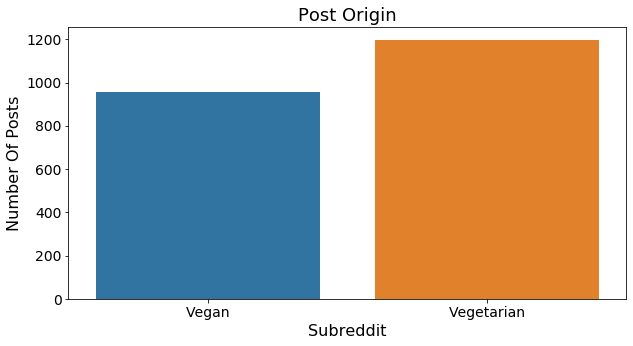

In [17]:
# Plotting the frequency of the number of posts in each subreddit.

tick_labels = ["Vegan", "Vegetarian"]

# Setting the figure size
plt.figure(figsize = (10,5))

# Plotting the graph
sns.countplot(df["subreddit"])

# Setting graph parameters
plt.title("Post Origin", size = 18)
plt.xlabel("Subreddit", size = 16)
plt.ylabel("Number Of Posts", size = 16)

# Making sure the only ticks are 0 and 1
plt.xticks(np.arange(0,2,1), 
           labels = tick_labels, 
           size   = 14)
plt.yticks(size = 14);

### Distribution of posts for each subreddit on each weekday

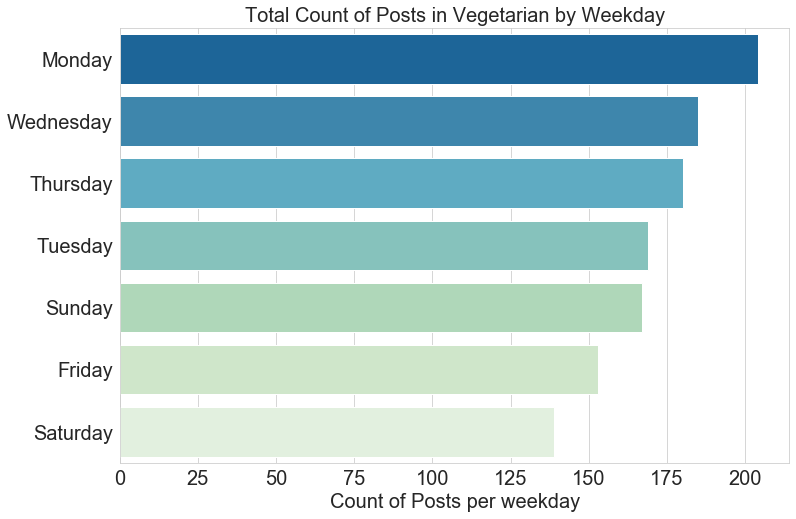

In [18]:
# Vegetarian subreddit

plt.figure(figsize =(12,8))
sns.set_style('whitegrid')
sns.barplot(data = sub1, x = 'weekday', y = 'index', palette = 'GnBu_r')
plt.xlabel('Count of Posts per weekday', size = 20)
plt.ylabel('')
#setting size of yticks and xticks to 20
plt.yticks(size = 20);
plt.xticks(size = 20);
plt.title("Total Count of Posts in Vegetarian by Weekday", size = 20);


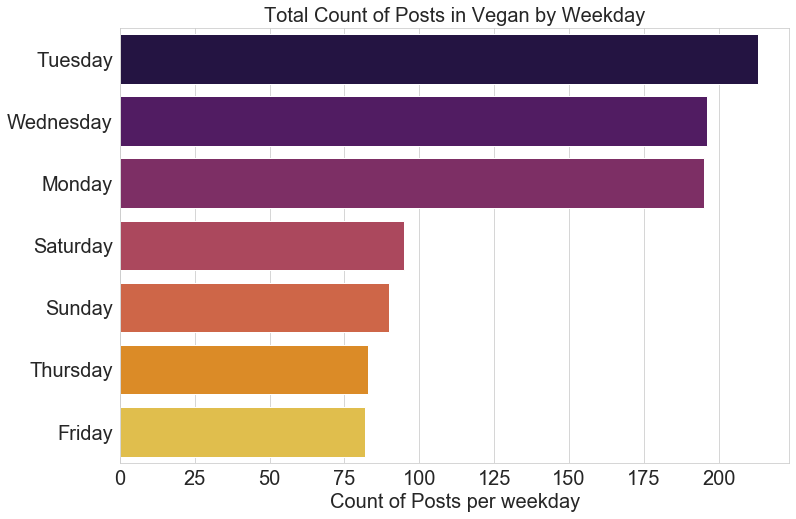

In [19]:
# Vegan Subreddit

plt.figure(figsize =(12,8))
sns.set_style('whitegrid')
sns.barplot(data = sub0, x = 'weekday', y = 'index', palette = 'inferno')
plt.xlabel('Count of Posts per weekday', size = 20)
plt.ylabel('')
#setting size of yticks and xticks to 20
plt.yticks(size = 20);
plt.xticks(size = 20);
plt.title("Total Count of Posts in Vegan by Weekday", size = 20);


### Most Common Words 

Before we start modeling, we need to know what the most frequent words are in each subreddit are because it might be harder for our model to predict with those words in the dataframe.

We will subset the dataframe into posts from r/Vegetarian and r/Vegan and use count vectorizer to determine the most frequent words. The words that occur most frequently will be appended to the set of stop words we will use in our grid searches.

In [21]:
#  Finding top 20 words for subreddit_1
# The list of all title_text for subreddit_1 ('Vegetarian')
subreddit1 = df_vegetarian['title_selftext']

# initializing the CountVectorizer to split our sentances back to words
cvec = CountVectorizer(stop_words = 'english')
df_cv1 = cvec.fit(subreddit1)

# Credit to Varun Ganti for this code

df_cv1 = pd.DataFrame(cvec.transform(subreddit1).todense(),columns=cvec.get_feature_names())
highest_cv1 = df_cv1.sum(axis=0)
df_cvec1 = highest_cv1.sort_values(ascending = False).head(20)
df_words_sub1 = pd.DataFrame({'words':df_cvec1.index, 'count':df_cvec1.values})
df_words_sub1['subreddit'] = 'Vegetarian'
df_words_sub1.head()

,words,count,subreddit
0,vegetarian,1132,Vegetarian
1,meat,1049,Vegetarian
2,like,626,Vegetarian
3,just,612,Vegetarian
4,eat,591,Vegetarian


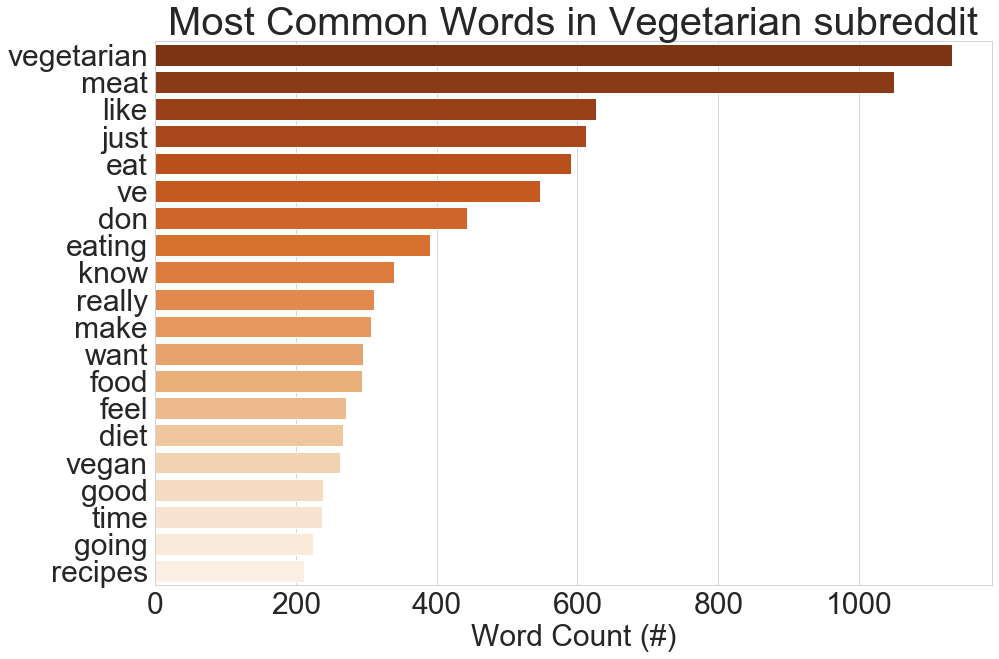

In [22]:
plt.figure(figsize=(15,10))
sns.barplot(data=df_words_sub1,
            y= 'words',#list(df_cvec1.index),
            x='count',#'Count_Vectorizer(units)',
            palette="Oranges_r");
#Setting the title to size 35
plt.title ('Most Common Words in Vegetarian subreddit', 
           size=40);
plt.ylabel('');
plt.xlabel('Word Count (#)', size = 30);
#setting size of yticks and xticks to 20
plt.yticks(size = 30);
plt.xticks(size = 30);

In [23]:
#  Finding top 20 words for subreddit_2 (Vegan)
# The list of all title_text for subreddit_2 ('Vegan')

subreddit2 = df_vegan['title_selftext']

# initializing the CountVectorizer to split our sentances back to words

cvec = CountVectorizer(stop_words = 'english')
df_cv2 = cvec.fit(subreddit2)

# Credit to Varun Ganti for this code

df_cv2 = pd.DataFrame(cvec.transform(subreddit2).todense(),columns=cvec.get_feature_names())
highest_cv2 = df_cv2.sum(axis=0)
df_cvec2 = highest_cv2.sort_values(ascending = False).head(20)
df_words_sub2 = pd.DataFrame({'words':df_cvec2.index, 'count':df_cvec2.values})
df_words_sub2['subreddit'] = 'Vegan'
df_words_sub2.head()

,words,count,subreddit
0,vegan,1439,Vegan
1,just,483,Vegan
2,like,454,Vegan
3,meat,367,Vegan
4,ve,346,Vegan


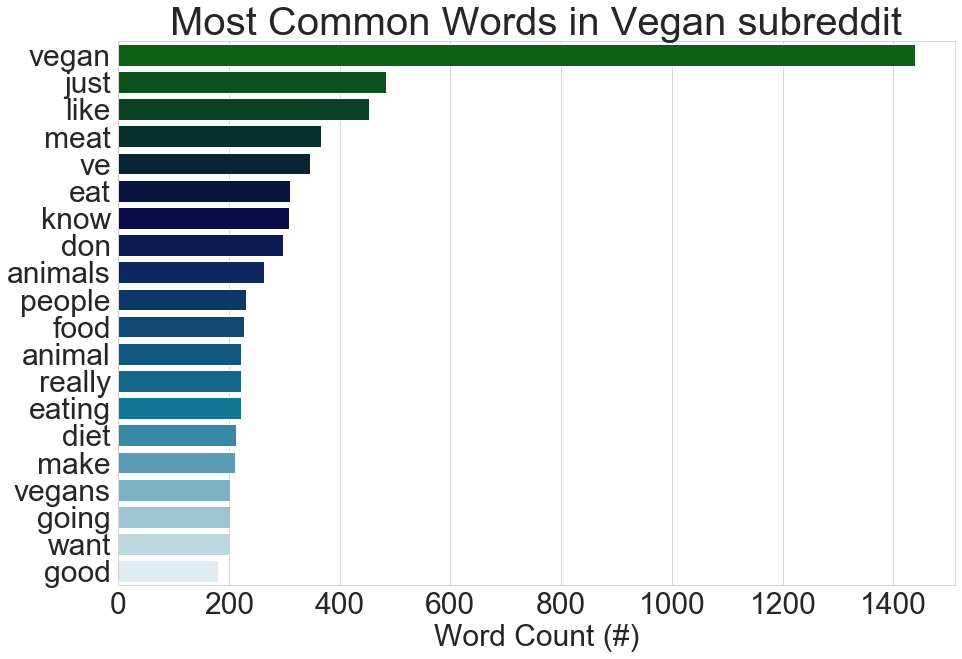

In [24]:
plt.figure(figsize=(15,10))
sns.barplot(data=df_words_sub2,
            y='words',
            x='count',
            palette="ocean");
#Setting the title to size 35
plt.title ('Most Common Words in Vegan subreddit', 
           size=40);
plt.ylabel('');
plt.xlabel('Word Count (#)', size = 30);
#setting size of yticks and xticks to 20
plt.yticks(size = 30);
plt.xticks(size = 30);

### Comparing the top words for both groups together

In [25]:
#credit for this graph goes to Julie Vovchenko
df_words_both = pd.concat([df_words_sub1, df_words_sub2])
df_words_both = df_words_both.sort_values(by = 'count', ascending = False)
df_words_both.head(5)

,words,count,subreddit
0,vegan,1439,Vegan
0,vegetarian,1132,Vegetarian
1,meat,1049,Vegetarian
2,like,626,Vegetarian
3,just,612,Vegetarian


In [26]:
df_words_both.shape

(40, 3)

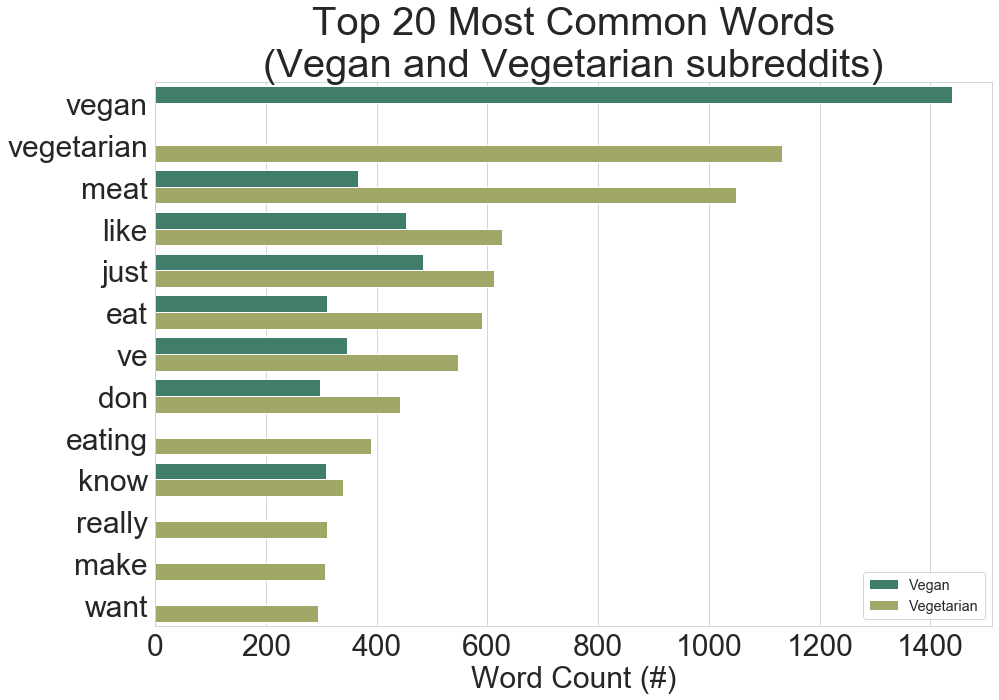

In [27]:
plt.figure(figsize=(15,10))
sns.barplot(data=df_words_both.head(20),
            y='words',
            x='count',
            hue = 'subreddit',
            palette="gist_earth");
#Setting the title to size 35
plt.title ('Top 20 Most Common Words\n(Vegan and Vegetarian subreddits)', 
           size=40);
plt.ylabel('');
plt.xlabel('Word Count (#)', size = 30);
#setting size of yticks and xticks to 20
plt.yticks(size = 30);
plt.xticks(size = 30);
plt.legend(loc='lower right', fontsize='x-large');

In [28]:
subreddit = df['title_selftext']
cvec = CountVectorizer(stop_words = 'english')
df_cv = cvec.fit(subreddit)
df_cv = pd.DataFrame(cvec.transform(subreddit).todense(),columns=cvec.get_feature_names())
highest_cv = df_cv.sum(axis=0)
df_cvec = highest_cv.sort_values(ascending = False).head(20)
df_words_sub = pd.DataFrame({'words':df_cvec.index, 'count':df_cvec.values})
df_words_sub['subreddit'] = 'Both Vegan and Vegetarian'
df_words_sub.head()

,words,count,subreddit
0,vegan,1702,Both Vegan and Vegetarian
1,meat,1416,Both Vegan and Vegetarian
2,vegetarian,1266,Both Vegan and Vegetarian
3,just,1095,Both Vegan and Vegetarian
4,like,1080,Both Vegan and Vegetarian


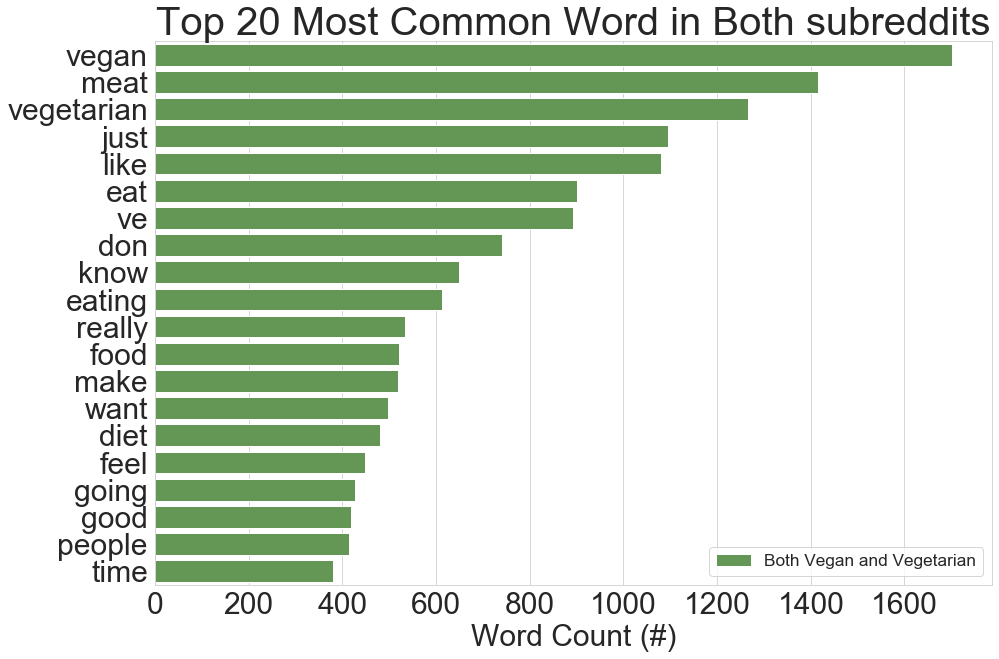

In [29]:
plt.figure(figsize=(15,10))
sns.barplot(data=df_words_sub.head(20),
            y='words',
            x='count',
            hue = 'subreddit',
            palette="gist_earth");
#Setting the title to size 35
plt.title ('Top 20 Most Common Word in Both subreddits', 
           size=40);
plt.ylabel('');
plt.xlabel('Word Count (#)', size = 30);
#setting size of yticks and xticks to 20
plt.yticks(size = 30);
plt.xticks(size = 30);
plt.legend(loc='lower right', fontsize='xx-large');


## Preprocessing of the data

### Adding the most frequently used words to the stopwords parameter 'english'

In [30]:
# creating the list of stop words to exclude from my analysis

stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['vegetarian', 'vegan']
for i in newStopWords:
    stopwords.append(i)


### Creating a funtion that will remove characters and Lemmatize the words in the column 'text_selftext'

In [31]:
def pre_process(string):
    string = re.sub('[0-9]+', '', string)
    lemmatizer = WordNetLemmatizer()
    lem_list = []
    strings = string.split()
    for word in strings:
        lem_string = lemmatizer.lemmatize(word)
    
        lem_list.append(lem_string)
    
    lem_sentence = ' '.join(lem_list)
    return lem_sentence
    

In [32]:
 df.reset_index(inplace=True)

In [33]:
length = len(df['title_selftext'])

pre_process(df['title_selftext'][3])

"dropping meat in long time (heavy) meat eater. i want to make a change. i'm cutting out beef and pork immediately and will work on cutting out chicken. i hope to be down to nothing but fish and vegetable by the end of february.i'm going to have to relearn how to cook. i feel a little overwhelmed by the idea, but i think it is the right move. i made tofu stir fry last night and it wa pretty good, so i'm hopeful.i'm rambling, sorry..."

In [34]:
for i in range(length):
    df['title_selftext'][i] = pre_process(df['title_selftext'][i])


/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Model Preparation

## Baseline Model

A baseline in classification gives us an idea of how exactly the model is performing. The baseline is simply the percentage of occurrences of our target in the data; in this case it will be what percentage of posts are from the subreddit Vegetarian.The Baseline Model shows that the predictions for Y=1 (Being Vegetarian) is 55% accurate. We will now find out if our models can make a better prediction. 

In [36]:
X = df["title_selftext"]
y = df["subreddit"]

y.value_counts(normalize = True)

1    0.556485
0    0.443515
Name: subreddit, dtype: float64

### Modeling
Now that our text is in the format we want, we can begin the process of modeling.

There are a few steps we must do before we start running models: we have to define the X and y variables and run a train-test split on the data.

In [37]:

# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

## Transforming Data using CountVectorization and running a Logistic Regression

The Logistic Regression is one of the most efficient estimators to use for discrete dependent variables. Here I am setting up a pipeline for CountVectorizing, Estimating and doing a GridSearch for the best parameters to use in the model.

In [38]:
pipe = Pipeline(steps = [('cvec', CountVectorizer()),
                         ('model', LogisticRegression(solver = 'liblinear'))
                        ])    
# Construct Grid Parameters
hyperparams = {'cvec__ngram_range': [(1,1), (1,2)],
               'cvec__stop_words': [stopwords, None],
               'cvec__max_features' : [100,500],
               'model__penalty': ['l1', 'l2'],
               'model__C': [0.02, 0.05, 1.0]
              }
 # Perform Grid Search
gs = GridSearchCV(pipe, 
                 param_grid=hyperparams,
                 cv = 3,
                 scoring = 'accuracy')
results = gs.fit(X_train, y_train)

In [39]:
gs_model = gs.best_estimator_

In [40]:
# Get scores

acc_score = gs.best_score_
print('Best accuracy: {:.4f}'.format(acc_score))
train_score = gs_model.score(X_train, y_train)
print('Best TRAIN set accuracy: {:.4f}'.format(train_score))
test_score = gs_model.score(X_test, y_test)
print('Best TEST set accuracy: {:.4f}'.format(test_score))

Best accuracy: 0.8175
Best TRAIN set accuracy: 0.8695
Best TEST set accuracy: 0.8254


In [41]:
cross_val_score(gs_model, X, y, cv=5).mean()

0.8168063192765077

## Transforming Data using CountVectorizer and Running a Multinomial NB Regression

In [42]:
pipe1 = Pipeline(steps = [('cvec', CountVectorizer()), 
                         ('mnb', MultinomialNB())
                        ])    
# Construct Grid Parameters
hyperparams1 = {'cvec__ngram_range': [(1,1), (1,2)],
               'cvec__stop_words': [stopwords, None],
               'cvec__max_features' : [100,500 ],
              }
 # Perform Grid Search
gs1 = GridSearchCV(pipe1, 
                 param_grid=hyperparams1,
                 cv = 3,
                 scoring = 'accuracy')
results1 = gs1.fit(X_train, y_train)

In [43]:
gs1_model = gs1.best_estimator_


In [44]:
# Get score

acc_score = gs1.best_score_
print('Best accuracy: {:.4f}'.format(acc_score))
train_score1 = gs1_model.score(X_train, y_train)
print('Best TRAIN set accuracy: {:.4f}'.format(train_score1))
test_score1 = gs1_model.score(X_test, y_test)
print('Best TEST set accuracy: {:.4f}'.format(test_score1))

Best accuracy: 0.7967
Best TRAIN set accuracy: 0.8126
Best TEST set accuracy: 0.8127


In [45]:
cross_val_score(gs1_model, X, y, cv=5).mean()

0.796351934186068

## Transforming Data Using TF-IDF and Running a Logistic Regression

In [46]:
pipe_tfidf = Pipeline(steps = [('tvec', TfidfVectorizer()),
                         ('model', LogisticRegression(solver = 'liblinear'))
                        ])    
# Construct Grid Parameters
hyperparams2 = {'tvec__ngram_range': [(1,1), (1,2)],
               'tvec__stop_words': [stopwords, None ],
               'tvec__max_features' : [100,500],
               'model__penalty': ['l1', 'l2'],
               'model__C': [0.02, 0.05, 1.0]
              }
 # Perform Grid Search
gs_tfidf = GridSearchCV(pipe_tfidf, 
                 param_grid=hyperparams2,
                 cv = 3,
                 scoring = 'accuracy')
results = gs_tfidf.fit(X_train, y_train)

In [47]:
gs_tfidf_model = gs_tfidf.best_estimator_

In [48]:
CV_score = gs_tfidf.best_score_
print('Best accuracy: {:.4f}'.format(CV_score))
train_score2 = gs_tfidf_model.score(X_train, y_train)
print('Best TRAIN set accuracy: {:.4f}'.format(train_score2))
test_score2 = gs_tfidf_model.score(X_test, y_test)
print('Best TEST set accuracy: {:.4f}'.format(test_score2))

Best accuracy: 0.8286
Best TRAIN set accuracy: 0.8661
Best TEST set accuracy: 0.8254


In [49]:
cross_val_score(gs_tfidf_model, X, y, cv=5).mean()

0.8326343772596403

## Transforming Data using a TF-IDF Vectorizer and Running a SVM Regression

I decided to use a SVM Regression model because it is one of the better models for text classification. The idea of SVM is simple: The algorithm creates a line or a hyperplane which separates the data into classes. In the case of the data here, the group of Vegetarians and Vegans are pretty homogeneous. So creating a hyperplane that divides them should give a good result. 

In [50]:
from sklearn.svm import SVC

pipe_svc = Pipeline(steps = [('tvec', TfidfVectorizer()),
                         ('svc', SVC(gamma = 'scale'))])   
# Construct Grid Parameters
hyperparams_svc = {'tvec__ngram_range': [(1,1), (1,2)],
               'tvec__stop_words': [stopwords, None ],
               'tvec__max_features' : [100,500],
               "svc__C": np.logspace(-2,2, 10),
                "svc__kernel": ["rbf"]
               
              }
 # Perform Grid Search
gs_svc = GridSearchCV(pipe_svc, 
                 param_grid=hyperparams_svc,
                 cv = 3,
                 scoring = 'accuracy')
results_svc = gs_svc.fit(X_train, y_train)

In [51]:
gs_svc_model = gs_svc.best_estimator_

In [52]:
acc_score = gs_svc.best_score_
print('Best accuracy: {:.4f}'.format(acc_score))
train_score_svc = gs_svc_model.score(X_train, y_train)
print('Best TRAIN set accuracy: {:.4f}'.format(train_score_svc))
test_score_svc = gs_svc_model.score(X_test, y_test)
print('Best TEST set accuracy: {:.4f}'.format(test_score_svc))

Best accuracy: 0.8133
Best TRAIN set accuracy: 0.9854
Best TEST set accuracy: 0.7930


In [53]:
cross_val_score(gs_svc_model, X, y, cv=5).mean()

0.8149685516555424

# Model Selection

Looking at the Cross Val Scores, the best model is the TF-IDF Vectorizer with Logistic Regression, which has a score of 0.83. However the model with the Count Vectorizer and Multinomial NB had almost no variance compared to the others, even though its CV Score was lowest. It was difficult to decide which one to choose. The Best Score or the lowest Variance.

Scores of our model is as follows:
    
| Classifier | Estimator  | Train Score | Test Score |CV Accuracy |
|------------|------------|-------------|------------|------------|
| CountVect  | Logistic   | 0.87        | 0.82       | 0.82       |
| CountVect  | Multinomial| 0.81        | 0.81       | 0.79       |
| TFIDF      | Logistic   | 0.86        | 0.82       | 0.83       |
| TFIDF      | SVM        | 0.98        | 0.79       | 0.81       |

So I decided to look at another metric before making my choice. I will be also looking at the ROC curve (Reciever Operating Characteristic curve) and the Area under it (the AUC) for both of these models. The ROC curve shows the overlap between the positive class and negative classes by moving our classification threshold from 0 to 1. The accuracy of the test depends on how well the test separates the texts into those that belong to the Vegetarian subreddit and those that do not. Accuracy is measured by the area under the ROC curve. An area of 1 represents a perfect test; an area of .5 represents a worthless test.


### The ROC Curve and the AUC 

The ROC for CV with Multinomial NB Regression

In [54]:
pred_proba = [i[1] for i in gs1.predict_proba(X_test)]

pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

In [55]:
pred_df.head()

,true_values,pred_probs
665,1,0.984869
672,1,0.578333
1632,0,0.000649
1534,0,0.001875
832,1,0.334663


In [56]:
from sklearn.metrics import roc_auc_score

roc_auc_score(pred_df['true_values'], pred_df['pred_probs'])

0.8943017882258388

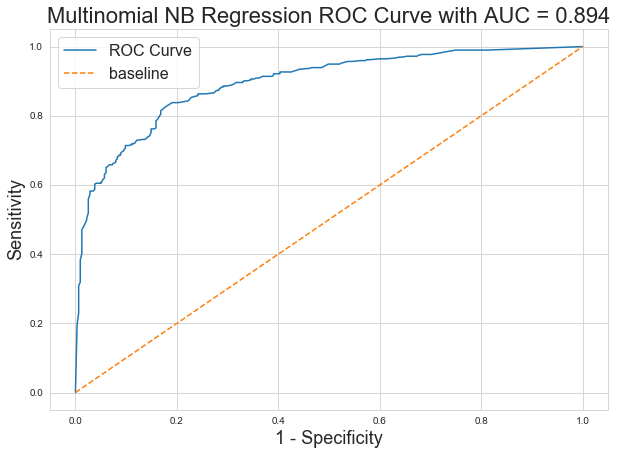

In [57]:
# This code is taken from our lesson on ROC's

# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values.
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title(f'Multinomial NB Regression ROC Curve with AUC = {round(roc_auc_score(pred_df["true_values"], pred_df["pred_probs"]),3)}', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

Comparing it to the TFIDF with Logistic Regression model

In [58]:
pred_proba1 = [i[1] for i in gs_tfidf.predict_proba(X_test)]

pred_df1 = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba1})

In [59]:
roc_auc_score(pred_df1['true_values'], pred_df1['pred_probs'])

0.9152903355435001

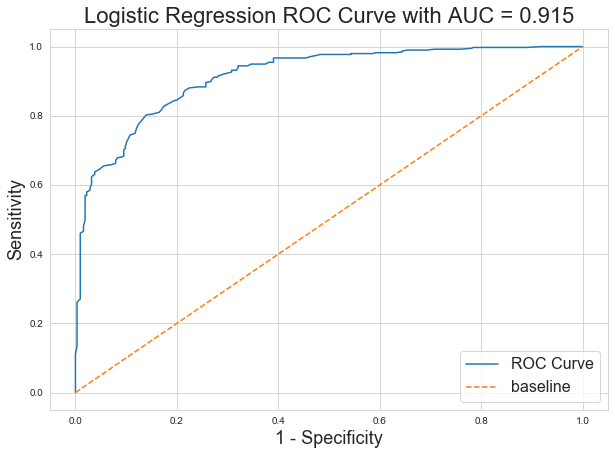

In [60]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values.
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df1, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df1, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title(f'Logistic Regression ROC Curve with AUC = {round(roc_auc_score(pred_df1["true_values"], pred_df1["pred_probs"]),3)}', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

**This made the choice clear. I will be choosing the TF-IDF with Logistic Regression model for classifying the texts into groups**

## Evaluating the Logistic Regression with TF-IDF

In [61]:
# Get score

acc_score = gs_tfidf.best_score_
print('Best accuracy: {:.4f}'.format(acc_score))
train_score_tfidf = gs_tfidf_model.score(X_train, y_train)
print('Best TRAIN set accuracy: {:.4f}'.format(train_score_tfidf))
test_score_tfidf = gs_tfidf_model.score(X_test, y_test)
print('Best TEST set accuracy: {:.4f}'.format(test_score_tfidf))

Best accuracy: 0.8286
Best TRAIN set accuracy: 0.8661
Best TEST set accuracy: 0.8254


### Calculating the confustion matrix

One way of evaluation our models will be with a confusion matrix. A confusion matrix allows us to look at how our model classified our data: it plots the true y values and the predicted y values so that we can have an idea of how the model performs with each class.

In [62]:
preds = gs_tfidf_model.predict(X_test)
cm = confusion_matrix(y_test, preds)
cm

array([[234,  81],
       [ 43, 352]])

In [63]:
pred_train = gs_tfidf_model.predict(X_train)


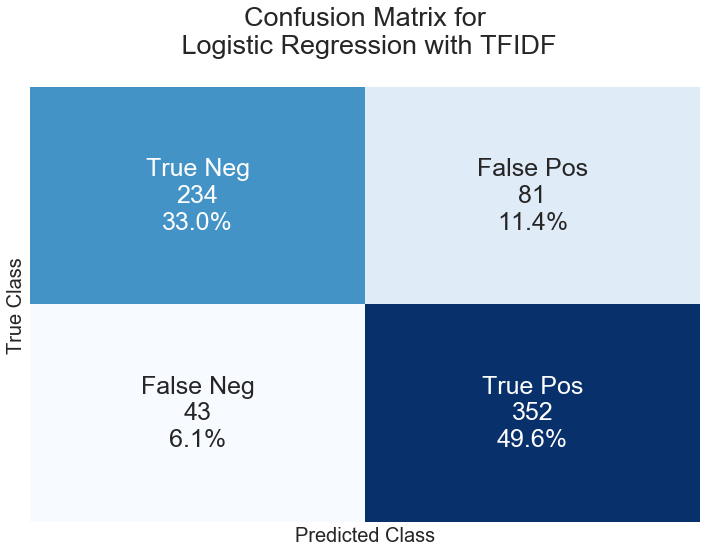

In [64]:
# Creating Confusion Matrix 

preds = gs_tfidf.predict(X_test)
con_matrix = confusion_matrix(y_test, preds)

# credit to this source:
# https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

plt.figure(figsize = (12,8))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                con_matrix.flatten()]
group_percents = ["{0:.1%}".format(value) for value in
                     con_matrix.flatten()/np.sum(con_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percents)]
labels = np.asarray(labels).reshape(2,2)
labels
sns.heatmap((con_matrix), 
            annot=labels,
            annot_kws={"size": 25},#writing the data value in each cell big enough to be 
                                    #visible in the presentation
            
            cmap='Blues', #color of the map (red/blue)
            fmt="", #format of annotations (1 decimal float)
            xticklabels=False, #removing xtickslabels
            yticklabels=False, #removing ytickslabels
            cbar=False); #no colorbar drawing

plt.title ('Confusion Matrix for\n Logistic Regression with TFIDF\n', 
           size=27);
plt.xlabel('Predicted Class', size = 20);
plt.ylabel('True Class', size = 20);


In [65]:
# Calculating all the Metrics from the Confusion Matrix

TrueNeg = cm[0][0]
TruePos = cm[1][1]
FalsePos = cm[0][1]
FalseNeg = cm[1][0]
Total = preds.shape[0]
Accuracy = (TrueNeg+TruePos)/(Total)
print(f'Accuracy = {Accuracy}')
print(f'Missclassification = {1-Accuracy}')
print(f'Precision = {TruePos/(FalsePos+TruePos)}')
print(f'Sensitivity = {TruePos/(TruePos+FalseNeg)}')
print(f'Specificity = {TrueNeg/(TrueNeg+FalsePos)}')

Accuracy = 0.8253521126760563
Missclassification = 0.17464788732394365
Precision = 0.812933025404157
Sensitivity = 0.8911392405063291
Specificity = 0.7428571428571429


- The Accuracy score shows us the total percent of words that were classified correctly
- The Precision score shows us the percent of words in class 'Vegetarian' that are actually Vegetarian.
- The Recall score shows us the percent of words in 'Vegetarian' that were classified correctly
- The F1 Score is the harmonic mean of Precision and Recall. It is heavily used as a performance metric in Information Retrieval tasks such as search, document classification or any task where you need a high True Positive score. It can range from 0 to 1.

### Finding the Coefficients

In [66]:
features = gs_tfidf_model.steps[0][1].get_feature_names()
features_df = pd.DataFrame(features, columns =['features'])


In [67]:
# Converting the coefficients of the features into a dataframe

coefficients = pd.DataFrame(pd.Series(gs_tfidf_model.steps[1][1].coef_[0]))


In [68]:
gs_tfidf_model.steps[1][1].coef_[0].shape

(500,)

In [69]:
coef = pd.concat([coefficients,features_df],axis=1)
coef.head()

,0,features
0,0.000000,able
1,0.000000,able to
2,-0.163449,about
3,0.000000,about it
4,0.000000,about the


### Plotting the coefficients to see the top 20 

In [70]:
# getting names(features) of our coefficients from TfidfVectorizer
names = gs_tfidf.best_estimator_.steps[0][1].get_feature_names()

# getting coefficients from LogisticRegression
coefs = gs_tfidf.best_estimator_.steps[1][1].coef_

# putting these strings into one dataframe
coef_df = pd.DataFrame({
    'word':names,
    'coef':coefs[0],
    'exp_coef':np.exp(coefs[0])
})
coef_df = coef_df.sort_values('coef', ascending = False)


In [71]:
coef_df.head()

,word,coef,exp_coef
443,vegetarian,19.345308,2.520928e+08
447,veggie,4.617619,1.012526e+02
258,meat,3.510891,3.347808e+01
435,veg,2.881912,1.784836e+01
494,you,1.847889,6.346410e+00


Dividing the coefficient dataframe into positive values and negative values to be able to plot it.

In [72]:
positive_coefs = coef_df[coef_df['coef']>0]
negative_coefs = coef_df[coef_df['coef']<0]

positive_coefs = positive_coefs.sort_values('coef', ascending = False)
negative_coefs = negative_coefs.sort_values('coef', ascending = False)


In [73]:
coef_concat = pd.concat([positive_coefs, negative_coefs])
coef_concat.head()

,word,coef,exp_coef
443,vegetarian,19.345308,2.520928e+08
447,veggie,4.617619,1.012526e+02
258,meat,3.510891,3.347808e+01
435,veg,2.881912,1.784836e+01
494,you,1.847889,6.346410e+00


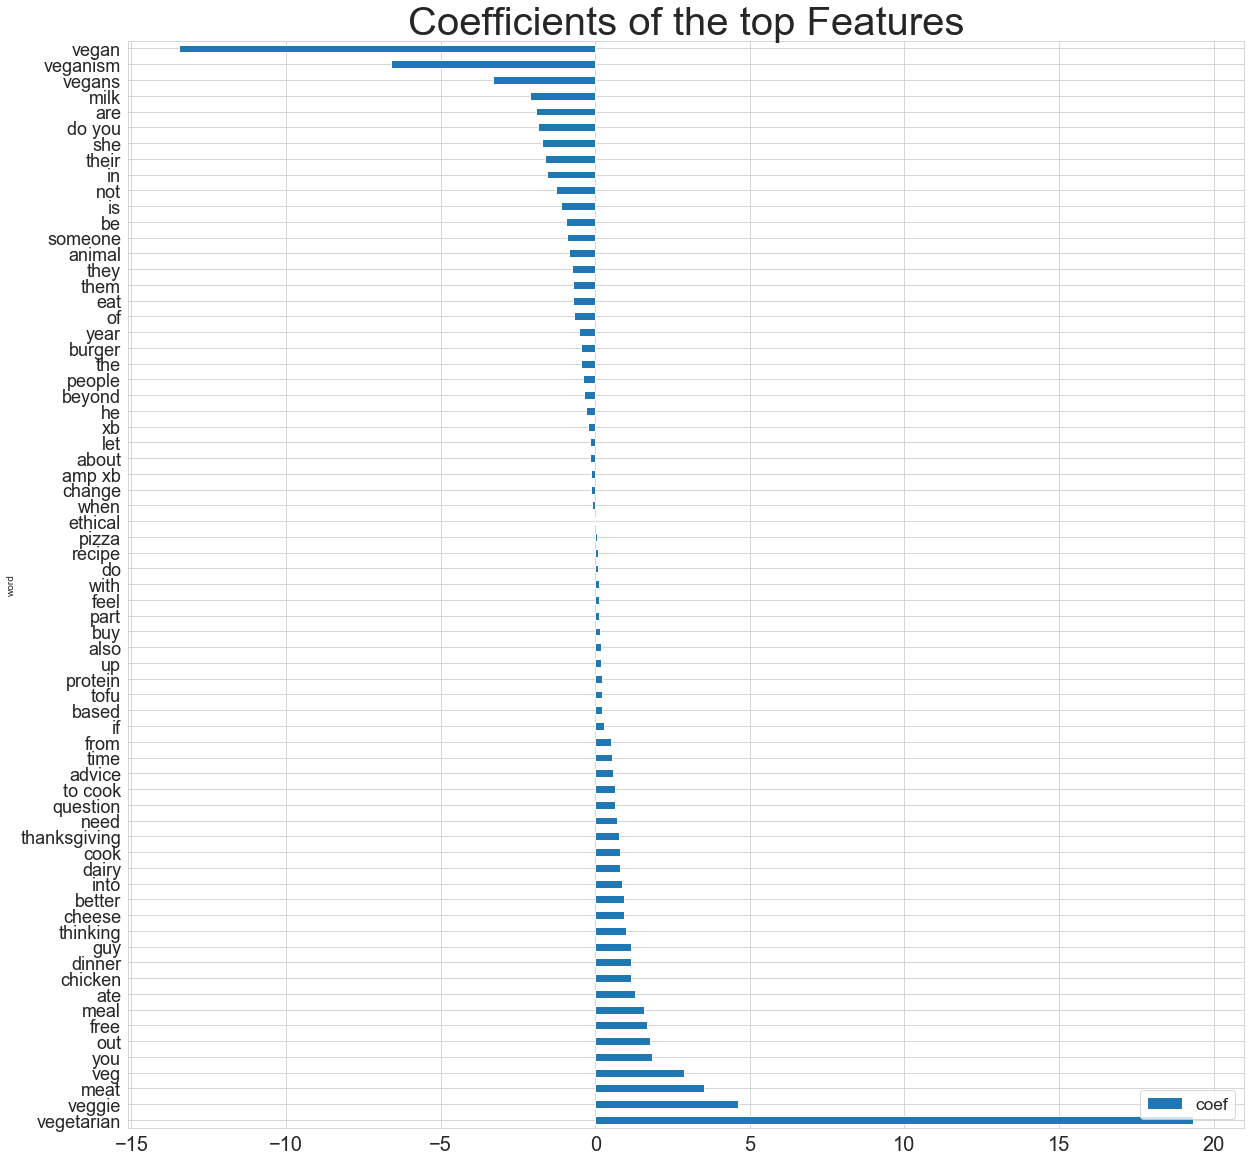

In [74]:
# Plotting the two concatenated dataframes

coef_concat.plot(kind= 'barh', title = "Top Features and their Coefficients", 
             x = 'word', y= 'coef', figsize= (20,20));
plt.yticks(size = 18);
plt.xticks(size = 20);
plt.legend(loc='lower right', fontsize='xx-large');
plt.title ('Coefficients of the top Features', 
           size=40);



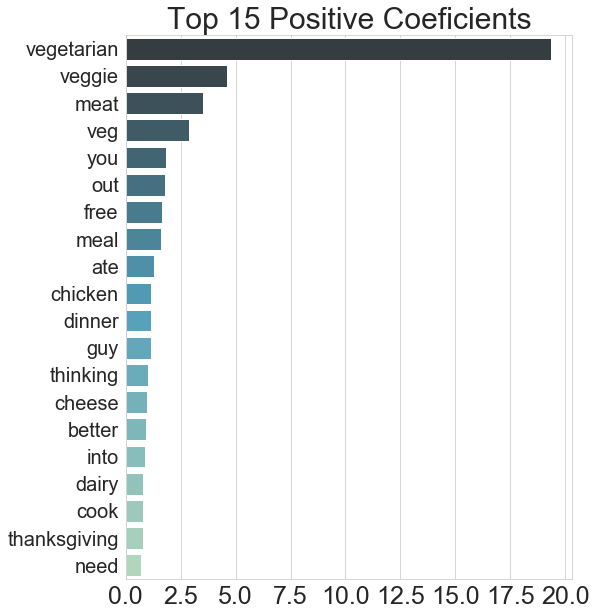

In [75]:
# Visualizing top positive coefficients of the Logistic Regression Model, 
# to pick those that are most effective in predicting the correct subreddit

plt.figure(figsize=(8,10))
sns.set_style("whitegrid")
sns.barplot(data=positive_coefs.head(20), 
            x='coef', 
            y='word', 
            palette="GnBu_d") ;
#setting sise of the title to 20
plt.title ('Top 15 Positive Coeficients', 
           size=30);
#Removing the xlabel and ylabel
plt.ylabel('');
plt.xlabel('');
plt.yticks(size = 20);
plt.xticks(size = 25);

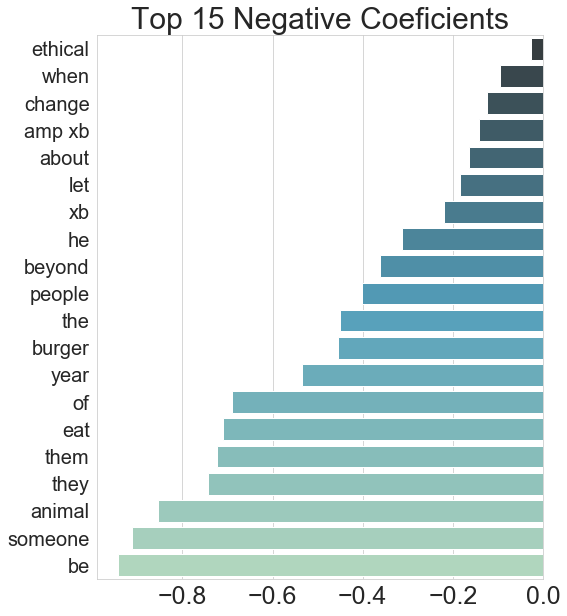

In [76]:
# Visualizing top negative coefficients of the Logistic Regression Model, 
# to pick those that are most effective in predicting the correct subreddit

plt.figure(figsize=(8,10))
sns.set_style("whitegrid")
sns.barplot(data=negative_coefs.head(20), 
            x='coef', 
            y='word', 
            palette="GnBu_d") ;
#setting sise of the title to 20
plt.title ('Top 15 Negative Coeficients', 
           size=30);
#Removing the xlabel and ylabel
plt.ylabel('');
plt.xlabel('');
plt.yticks(size = 20);
plt.xticks(size = 25);

The words that were most strongly predictive of being in the Vegetarian group were  vegetarian, veggie, meat, meal, chicken. But also interestingly and more relevantly to the purpose of this study, cheese and  dairy


# Conclusion

The problem that we had set out to solve was to identify the Vegetarians from the posts that were posted to the two groups Vegetarian and Vegan because we want to start producing plant based milk as against dairy milk. We used Pushshift's API to collect data from two of the subreddits 'Vegetarian' and 'Vegan'so that we can identify the posts that are being posted by Vegetarians. After doing the initial cleanup of the data, I concatenated the dataframes to be used for training the model. 

While doing the EDA, we found the days of the week that were the post popular for postings so that we were able to get a larger amount of posts to use in our training data. 
    
The best model to predict whether a post belongs to the Vegetarian or the Vegan subreddit was the Logistic Regression with TFIDF Vectorization. It had an Accuracy Score of 82% and a Cross Val Score of 83%. It also had the ROC accuracy score of 91%. It was clearly the better model compared to the baseline as well as all the other models that I tested.
    
I was surprised that the SVM did not perform as well. Though its Cross Val score was 0.81, not much different from the Logistic model, it had a very high variance implying that it was very overfitted. Since SVM fits a hyperplane to classify data, that is understandable.
    
Using this model, I would get reasonably good results in identifying which posts belonged to the Vegetarians in the group and which would belong to the Vegans. I would then be able to target my surveys at the people in the Vegetarian group and find out if they would want to drink plant based milk.


# Next Steps

- For next steps there is plenty of scope to better the model and find out if there is another one. Some of the models to try are Decision Trees or Random Forest models 

- I would like to be able to get more posts to run the regressions with a larger dataset. 

- Run regressions with other reddit groups included.. Like the meat eaters..to see if they would like to have plant based products as well


# References

https://www.dairyreporter.com/Article/2019/11/11/Miyoko-s-Creamery-wants-to-turn-dairy-farms-to-plant-based-The-economy-is-changing?utm_source=copyright&utm_medium=OnSite&utm_campaign=copyright

https://www.greenmatters.com/p/milk-sales-down